In [1]:
import time                     # Defualt python library
import serial                   # pip install pyserial
import matplotlib.pyplot as plt # pip install matplotlib 
import numpy as np              # pip install numpy
import xlrd                     # pip install xlrd
import xlsxwriter               # pip install xlscwriter
import cv2                      # pip install pyton-cv

# times:
Lista de tiempos cuando se le avisa a usario que accion hacer
# Instrucciones:
Diccionario con tiempo e instrucciones a cada segundo
# COM
Aqui se coloca el COM que se usara
# BAUD 
Velocidad de a la cual se transmiten los datos 
# STUDYDURATION
Tiempo que el estudio durará en segundos
# Label:
Esta es la etiqueta que se espera, la informacion debe de ser etiquetada en el microcontrolador:
Ejemplo
```c
Serial.print("m:");
Serial.printnl(SensorValue);

E

In [25]:
times = [15,25,40,50,65,75,90,100,115]
Instrucciones = {"15":"Begin Flexion 1",
                 "25":"End Flexion and waite 15 s",
                 "40":"Begin Extension 1",
                 "50":"End Extension and waite 15 s",
                 "65":"Begin Flexion 2",
                 "75":"End Flexion and waite 15 s",
                 "90":"Begin Extension 2",
                 "100":"End Flexion and waite 15 s, the program will end",
                 "115":"End"}
i = 0
### METADATA ###
COM   = "COM12"
BAUD  = 9600
sensor0   = []
sensor1   = []
sensor2   = []
sensor3   = []
sensor4   = []
sensor5   = []

Time  = []
Mega = serial.Serial(COM,BAUD)                # Initiate Communication with Node
print("Initialising Serial Communication")    # Message
time.sleep(3)                                 # Waite 3 seconds for stable connection  
print("Communication Established")            # Mesage
print("Prepare your arm in a resting stage")  # Message
time.sleep(1)                                 # Waite 1seconds for stable connection  
print("Adquisition will begin in 3 seconds")
time.sleep(1)                                 # Waite 1 seconds for stable connection  
print("t -3")
time.sleep(1)                                 # Waite 1 seconds for stable connection  
print("t-2")
time.sleep(1)                                 # Waite 1 seconds for stable connection  
print("t-1")
time.sleep(1)                                 # Waite 1 seconds for stable connection  
print("Adquisition has started")
STUDYDURATION = 10                            # Time of Study in seconds
PythonTime    = 0                             # Set Python time to 0
InitialTime   = time.time()                   # Get Time
timeout       = InitialTime + STUDYDURATION   # Duration of protocol

while PythonTime  < timeout:                  # While Time of protocol is still active
    PythonTime = time.time()                  # Get python Time
    if  PythonTime >= InitialTime + times[i]: # IF time reaches a change in protocol
        print(f"Time: {times[i]}, {Instrucciones[str(times[i])]}") # Tell user
        i+=1                                                       # Prepare counter for next message
    try:
        value = Mega.readline()                                    # Read Value
        cad   = value.decode()                                     # Decode to Ascii
        cad   = cad.strip()                                        # Remove \n and \r
        position = cad.index(":")                                  # Get the index of lable/status separation
        label  = cad[:position]                                    # Get label
        s0,s1,s2,s3,s4,s5 = cad[position+1:].split(",")            # Retrive sensor values
        if label  =="s":
            sensor0.append(s0)                                     # Append Sensor value 
            sensor1.append(s1)                                     # Append Sensor value 
            sensor2.append(s2)                                     # Append Sensor value 
            sensor3.append(s3)                                     # Append Sensor value 
            sensor4.append(s4)                                     # Append Sensor value 
            sensor5.append(s5)                                     # Append Sensor value 
            Time.append(PythonTime-InitialTime)                    # Append time

       
    except:
        print("Error Retrieving Data")
        
Mega.close()

Initialising Serial Communication
Communication Established
Prepare your arm in a resting stage
Adquisition will begin in 3 seconds
t -3
t-2
t-1
Adquisition has started


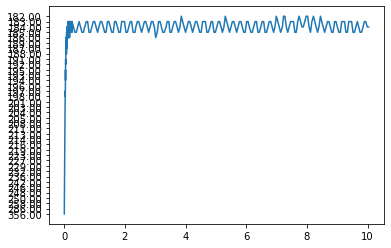

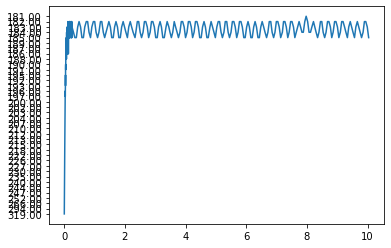

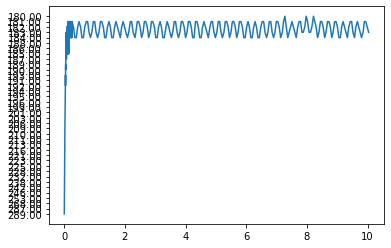

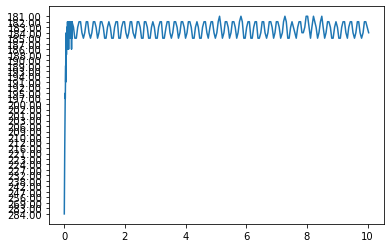

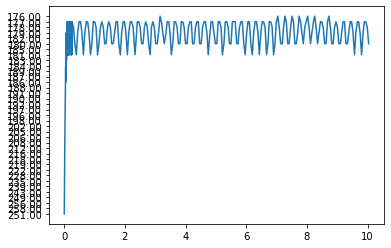

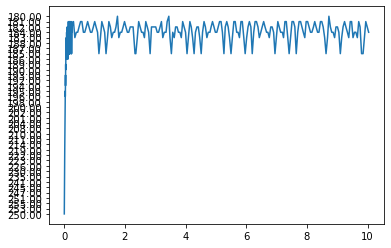

In [29]:
plt.plot(Time,sensor0)
plt.show()
plt.plot(Time,sensor1)
plt.show()
plt.plot(Time,sensor2)
plt.show()
plt.plot(Time,sensor3)
plt.show()
plt.plot(Time,sensor4)
plt.show()
plt.plot(Time,sensor5)
plt.show()
